## Projet Segmentation clientèles

### Problème business:

- Analyse détaillée des clients de l'entreprise et segmentation

### Mission:

- Analyse exploratoire et preprocessing

### Descriptif des données

ID : Identifiant unique du client


Year_Birth : année de naissance du client

Éducation : niveau d'éducation du client

Marital_Status : état civil du client

Revenu : Revenu annuel du ménage du client

Kidhome : nombre d'enfants dans le ménage du client

Teenhome : Nombre d'adolescents dans le ménage du client

Dt_Customer : Date d'inscription du client auprès de l'entreprise

Récence : nombre de jours depuis le dernier achat du client

Plainte : 1 si le client s'est plaint au cours des 2 dernières années, 0 sinon



MntWines : Montant dépensé pour le vin au cours des 2 dernières années

MntFruits : Montant dépensé en fruits au cours des 2 dernières années

MntMeatProducts : montant dépensé pour la viande au cours des 2 dernières années

MntFishProducts : montant dépensé pour le poisson au cours des 2 dernières années

MntSweetProducts : montant dépensé en sucreries au cours des 2 dernières années

MntGoldProds : Montant dépensé en or au cours des 2 dernières années


NumDealsPurchases : nombre d'achats effectués avec une remise

AcceptedCmp1 : 1 si le client a accepté l'offre lors de la 1ère campagne, 0 sinon

AcceptedCmp2 : 1 si le client a accepté l'offre lors de la 2ème campagne, 0 sinon

AcceptedCmp3 : 1 si le client a accepté l'offre dans la 3ème campagne, 0 sinon

AcceptedCmp4 : 1 si le client a accepté l'offre lors de la 4ème campagne, 0 sinon

AcceptedCmp5 : 1 si le client a accepté l'offre lors de la 5ème campagne, 0 sinon

Réponse : 1 si le client a accepté l'offre lors de la dernière campagne, 0 sinon


NumWebPurchases : nombre d'achats effectués sur le site Web de l'entreprise

NumCatalogPurchases : Nombre d'achats effectués à l'aide d'un catalogue

NumStorePurchases : Nombre d'achats effectués directement en magasin

NumWebVisitsMonth : nombre de visites sur le site Web de l'entreprise au cours du dernier mois




### Librairies

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from missingno import matrix

In [3]:
os.getcwd()

'C:\\Users\\Joel\\Desktop\\Clustering'

### Données

In [124]:
df = pd.read_table('clustering.csv')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [104]:
pd.set_option('display.max_columns', df.shape[1])

In [12]:
print("Nombre de lignes: ", df.shape[0])

Nombre de lignes:  2240


In [13]:
print("Nombre de colonnes: ", df.shape[1])

Nombre de colonnes:  29


### Types de données

In [14]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

La plupart des variables sont quantitatives sauf les variables: 

- Education (Niveau d'éducation du client), 
- Marietal_Status (Etat civil du client) 
- Dt_Customer(Date d'inscription du clients auprès de l'entreprises)

In [15]:
for col in df:
    unique_vals = df[col].unique()
    nr_val = df[col].nunique()
    if nr_val < 10:
        print("Nombre de valeur de {} :{} -- {}".format(col, nr_val, unique_vals))
    else:
        print("Nombre de valeur de {} :{}".format(col, nr_val))

Nombre de valeur de ID :2240
Nombre de valeur de Year_Birth :59
Nombre de valeur de Education :5 -- ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Nombre de valeur de Marital_Status :8 -- ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Nombre de valeur de Income :1974
Nombre de valeur de Kidhome :3 -- [0 1 2]
Nombre de valeur de Teenhome :3 -- [0 1 2]
Nombre de valeur de Dt_Customer :663
Nombre de valeur de Recency :100
Nombre de valeur de MntWines :776
Nombre de valeur de MntFruits :158
Nombre de valeur de MntMeatProducts :558
Nombre de valeur de MntFishProducts :182
Nombre de valeur de MntSweetProducts :177
Nombre de valeur de MntGoldProds :213
Nombre de valeur de NumDealsPurchases :15
Nombre de valeur de NumWebPurchases :15
Nombre de valeur de NumCatalogPurchases :14
Nombre de valeur de NumStorePurchases :14
Nombre de valeur de NumWebVisitsMonth :16
Nombre de valeur de AcceptedCmp3 :2 -- [0 1]
Nombre de valeur de AcceptedCmp4 :2 -- [0 1]
Nombre de valeur

**Les variables AcceptedCmp1, AcceptedCmp2, AcceptedCmp3/ AcceptedCmp4 et AcceptedCmp5 peuvent être regrouper lors de l'analyse exploratoire**

- 

- On constate que le nombre de modalités des variables sont au comprises entre 1 (Z_CostContact, Z_Revenue)  et 2240 (ID)

In [32]:
for col in df:
    if df[col].nunique() <= 2:
        print(col)

AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Z_CostContact
Z_Revenue
Response


- 9 variables ont un nombre de modalité inf ou égale à 2
 
 - AcceptedCmp3
 - AcceptedCmp4
 - AcceptedCmp5
 - AcceptedCmp1
 - AcceptedCmp2
 - Complain
 - Response
 
- 20 variables ont un nombre de modalité supérieur à 2

### Visualisation

#### Variable qualitative

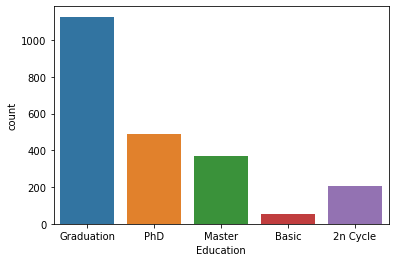

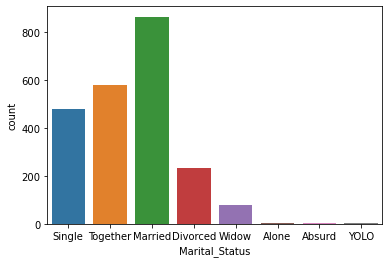

In [40]:
for col in df.select_dtypes(include=object):
    if col not in 'Dt_Customer':
        plt.figure()
        sns.countplot(df[col])

- La plupart des individus sont diplomés
- Les individus sont le plus souvent mariés

In [42]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

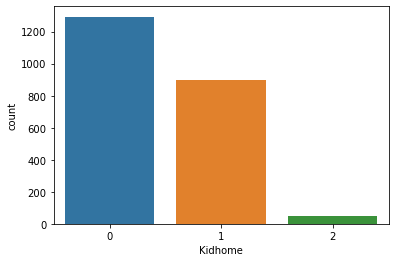

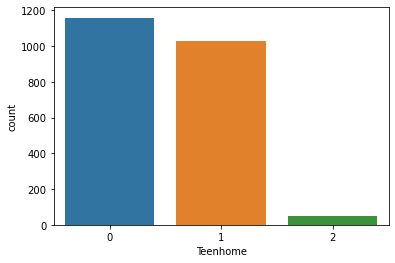

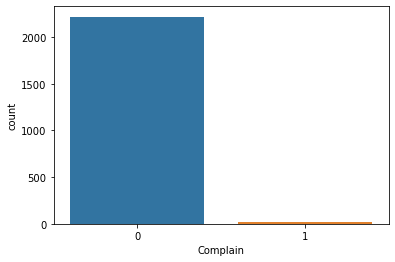

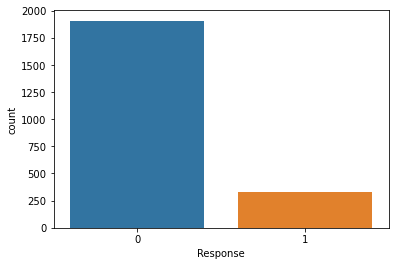

In [45]:
for col in df.select_dtypes(exclude=object):
    unique_vals = df[col].unique()
    nr_val = df[col].nunique()
    if nr_val < 10 and col not in ['Z_CostContact', 'Z_Revenue', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']:
        plt.figure()
        sns.countplot(df[col])

- La majorité des clients n'ont pas d'enfant (Kidhome)
- La plupart des clients ont au moins un adolescent dans leur ménage (Teenhome)
- La plupart des clients n'ont pas acceptés l'offre lors de la dernière campagne (Response)
- La majorité des clients ne sont pas plaint au cours de ces deux dernières années (Complainte)

In [ ]:
['Z_CostContact', 'Z_Revenue', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

### Creation de la variable Accept

In [63]:
df['Accept'] = 0

df['Accept'].loc[(df['AcceptedCmp1']==1) | (df['AcceptedCmp2']==1) | (df['AcceptedCmp3']==1) | (df['AcceptedCmp4']==1) | (df['AcceptedCmp5']==1)] = 1

C:\Users\Joel\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [64]:
df['Accept'].replace([0, 1], ["Non", "Oui"], inplace=True)

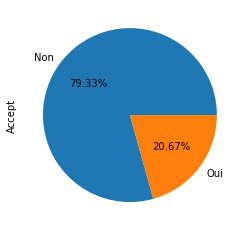

In [66]:
df['Accept'].value_counts().plot.pie(autopct= "%1.2f%%");

- Seulement 21% de clients ont accepté l'offre lors de l'ensemble des campagnes réalisées

In [91]:
print("P1: ", df['AcceptedCmp1'].value_counts()[1])
print("P2: ", df['AcceptedCmp2'].value_counts()[1])
print("P3: ", df['AcceptedCmp3'].value_counts()[1])
print("P4: ", df['AcceptedCmp4'].value_counts()[1])
print("P5: ", df['AcceptedCmp5'].value_counts()[1])

P1:  144
P2:  30
P3:  163
P4:  167
P5:  163


#### Depense

In [98]:
df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].describe()

MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProds  
count       2240.000000   2240.000000  
mean          27.062946     44.021875  
std           41.280498     52.167439  
min            0.000000      0.000000  
25%            1.000000      9.000000  
50%            8.000000     24.000000  
75%           33.000000     56.000000  
max          263.000000    362.000000

- La plupart des clients consomment en générale plus de Vin (moyenne = 303,935);
- Le montant maximal de dépense est accordé à l'achat de la viande

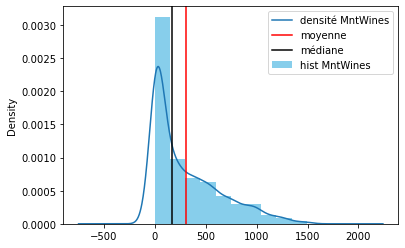

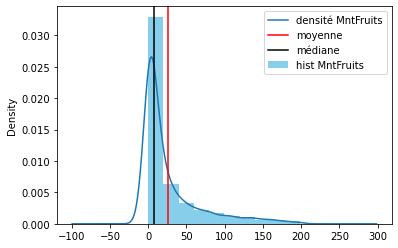

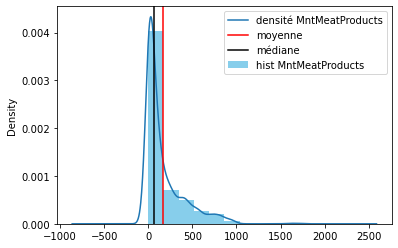

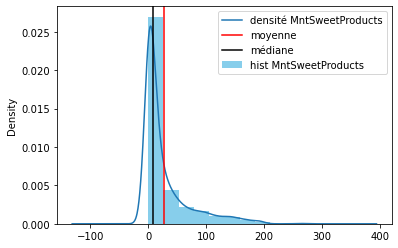

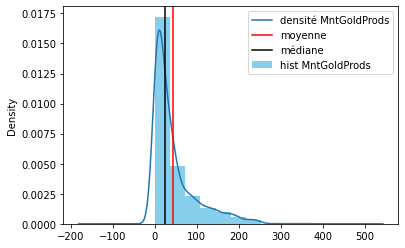

In [101]:
for col in df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']]:
    plt.figure()
    plt.hist(df[col], bins=10, density=True, label= 'hist '+col, color='skyblue')
    df[col].plot(kind ="density", label = 'densité ' + col)
    plt.axvline(x = df[col].mean(), c ='r', label='moyenne')
    plt.axvline(x = df[col].median(), c ='black', label='médiane')
    plt.legend()

- 50% des dépenses sont inférieures à la moyenne (médiane < moyenne dans toutes les dépenses possibles)
- Les distributions semblent être asymétrique (Cela pourra être confirmé par un test de normalité) => **Distribution étalée à gauche**

- Présence des valeurs abérrantes

In [105]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response Accept  
0              3         11         1    Non  
1              3         11         0    Non  
2              3         11         0    Non  
3              3         11         0    Non  
4              3         11         0    Non

#### Revenu

In [112]:
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

- Le revenu moyen est de 52247.25 Unité monétaire
- Le revenu le plus faible est de 1730 tandis que le plus élevé est de 666666 unité monétaire

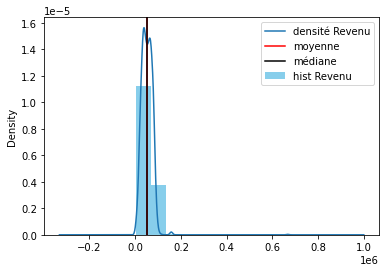

In [111]:
plt.figure()
plt.hist(df['Income'], bins=10, density=True, label= 'hist Revenu', color='skyblue')
df['Income'].plot(kind ="density", label = 'densité Revenu')
plt.axvline(x = df['Income'].mean(), c ='r', label='moyenne')
plt.axvline(x = df['Income'].median(), c ='black', label='médiane')
plt.legend();

- Les revenus sont normalement distribués (moyenne = Médiane)

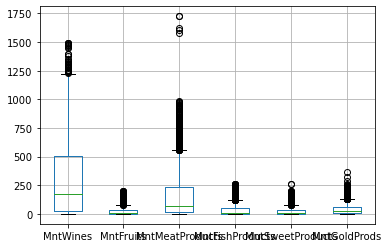

In [99]:
df[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].boxplot()

- Valeur abbérantes

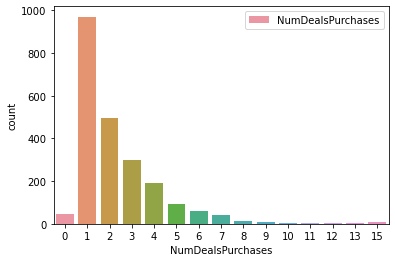

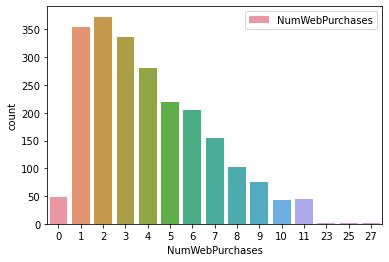

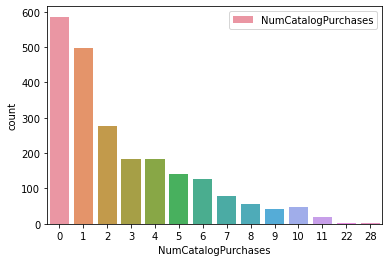

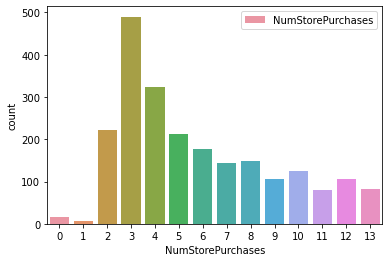

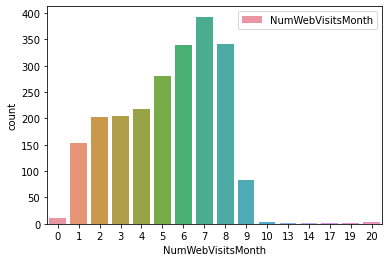

In [118]:
for col in df[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]:
    plt.figure()
    sns.countplot(df[col], label=col)
    plt.legend()

- La plupart des achats effectués avec remise se repartissent entre 1 et 2
- Il y a entre 1 et 8 visites au cours du dernier mois
- nombre d'achats effectués sur le site Web de l'entreprise est compris entre 1 et 7
- Nombre d'achats effectués à l'aide d'un catalogue est compris entre 0 et 2
- Nombre d'achats effectués directement en magasin est compris entre 2 et 7
- nombre de visites sur le site Web de l'entreprise au cours du dernier mois est compris entre 5 et 8

### Tranche d'âge

In [138]:
def categories(x):
    if  1893 <= x < 1900:
        text = "vieux"
    elif  1900 <= x < 1980:
        text = "Tres agé"
    elif 1980 <= x < 1990:
        text = "adulte"
    else:
        text = "jeune"
    return text

In [140]:
df['Categories age'] = df['Year_Birth'].map(categories)

In [142]:
df['Categories age'].value_counts().plot.bar()

- En tenant compte de la discrétisation ici, La population est très agées

In [130]:
sns.pairplot(df.select_dtypes(exclude=object))

- Colonne ID suit non seulement une loi uniforme et de plus est l'identifiant des clients donc peut informative => Elle sera supprimée

### Valeurs manquantes

In [120]:
matrix(df.drop('Accept', axis=1))

In [123]:
(df.isna().sum()/df.shape[0] *100).sort_values(ascending=False)

Income                 1.071429
ID                     0.000000
NumWebPurchases        0.000000
Response               0.000000
Z_Revenue              0.000000
Z_CostContact          0.000000
Complain               0.000000
AcceptedCmp2           0.000000
AcceptedCmp1           0.000000
AcceptedCmp5           0.000000
AcceptedCmp4           0.000000
AcceptedCmp3           0.000000
NumWebVisitsMonth      0.000000
NumStorePurchases      0.000000
NumCatalogPurchases    0.000000
NumDealsPurchases      0.000000
Year_Birth             0.000000
MntGoldProds           0.000000
MntSweetProducts       0.000000
MntFishProducts        0.000000
MntMeatProducts        0.000000
MntFruits              0.000000
MntWines               0.000000
Recency                0.000000
Dt_Customer            0.000000
Teenhome               0.000000
Kidhome                0.000000
Marital_Status         0.000000
Education              0.000000
Accept                 0.000000
dtype: float64

- Il n'y a que 1% des données qui sont manquantes ( Variable Income/Revenu)

### Preprocessing

- Traitement des valeurs manquantes
- Traitement des Valeurs abérrantes

In [125]:
df1 = df.copy()

In [126]:
df1.dropna(inplace=True)

- Nous supprimons les valeurs manquantes car leur pourcentage est faibles

In [131]:
df1.shape

(2216, 29)

In [127]:
df1.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

#### Traitement des Valeurs abérrantes